### NOUN Dataset + BLIP-2 Multimodal Model Pipeline
#### This notebook contains the pipeline for loading the BLIP2 Opt-2.7b model and running inference on the NOUN Dataset

Note that for this pipeline it is recommended to use a GPU with sufficient RAM.

##### Imports
Import modules, requires the installation of bitsandbytes and accelerate

In [ ]:
%pip install bitsandbytes accelerate

In [3]:
import csv
from PIL import Image
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
from tqdm import tqdm

##### Load model
uses bitsandbytes to allow int8 quanitization for greatly reduced memory usage, allowing the model to be run on Google Colab.

In [ ]:
# load processor
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")

# load in float16 # load in int8
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b",
                                                      load_in_8bit=True, device_map="auto")
# setup device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

##### Perform inference on NOUN Dataset
Currently uses default hyperparameters

In [ ]:
import pandas as pd
from tqdm import tqdm

# Define path to input and output files
input_file = 'dataset.csv'


# Define question for checking textures (unused for now)
QUESTION = "which colors do you see in the image?"

# Load data from input file into a pandas DataFrame
data = pd.read_csv(input_file)

# Define function to generate text using the model
def generate_text(row):
    raw_image = Image.open(row[0]).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt").to(DEVICE, torch.float16)
    generated_ids = model.generate(**inputs, max_new_tokens=20)
    generated_text = processor.batch_decode(generated_ids, use_nucleus_sampling=True, skip_special_tokens=True)[0].strip()
    return generated_text

# Add new column with generated text using the apply() method and a lambda function
data['BLIP-2, OPT-2.7b description'] = data.apply(lambda row: generate_text(row), axis=1)

# Write updated data to output file
data.to_csv(input_file, index=False)


##### Display dataset

,Label: bookendPrediction: a pair of orange plastic toys on a white background

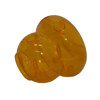

,Label: fidget toyPrediction: a red metal sculpture with a curved shape

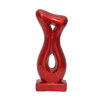

,Label: pencil sharpenerPrediction: a set of colorful wooden blocks arranged in a line

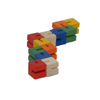

,Label: fish tank stonePrediction: a yellow and orange plastic egg shaped object

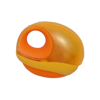

,Label: space ship topPrediction: a rainbow tie dye headband with a pink and blue feather

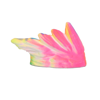

,Label: air blower for slr camerasPrediction: a silver metal object with a red dot on it

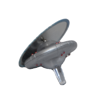

,Label: curlers formed togetherPrediction: a black ball with a red handle

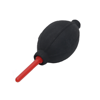

,Label: dog toyPrediction: a blue rubber toy with two arms

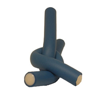

,Label: dog toy pet shopPrediction: a toy that looks like a spiky orange object

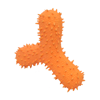

,Label: noisemakerPrediction: a red and yellow ball with colorful dots

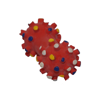

,Label: coiled worm toyPrediction: a green and orange plastic toy with two handles

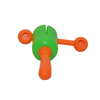

,Label: sling shotPrediction: a red plastic toy with orange spikes

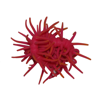

,Label: this light-up toyPrediction: a yellow and orange plastic toy with a red cap

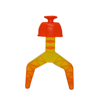

,Label: ball catcherPrediction: a toy with a colorful ball and a yellow handle

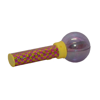

,Label: bird toyPrediction: a blue plastic shoe holder with holes on the side

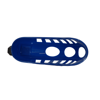

,Label: kenetic wheelPrediction: a blue and white mop with a blue handle

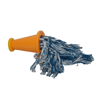

,Label: this coils stringPrediction: a metal and plastic toy with a blue handle

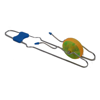

,Label: cat nip toyPrediction: a yellow plastic container with a lid

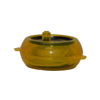

,Label: jacobs ladderPrediction: a yellow and orange egg with a brown head

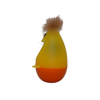

,Label: foam arrowPrediction: a set of four colorful coasters with a ribbon

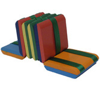

,Label: markerPrediction: a pink and green pipe with four holes

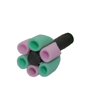

,Label: color changing ballPrediction: a green plastic cone with a small hole

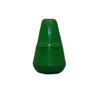

,Label: connected disk toyPrediction: a black and white ball with a white and black design

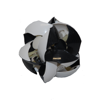

,"Label: boomerangPrediction: a toy with a yellow, red and blue star"

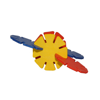

,Label: dog toyPrediction: a blue shoe with a white background

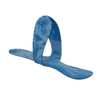

,Label: room freshener toyPrediction: a green and red plastic toy on a white background

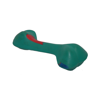

,Label: cat toy found at the pound storePrediction: a white ball with a hole in the middle

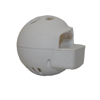

,Label: cover for room freshenersPrediction: a pink donut with three pom poms on it

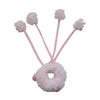

,Label: markerPrediction: a close up of a black plastic device

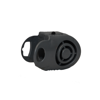

,Label: book endPrediction: a blue and purple plastic toy with a face

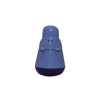

,Label: submarinePrediction: a metal metal armrest with a curved shape

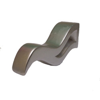

,Label: cat toy cagePrediction: a toy airplane shaped like a rocket is sitting on a white background

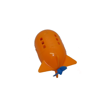

,Label: worm ball with cut off hands or starsPrediction: a toy box with an orange and green design

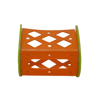

,Label: giant pen with pen tip removed and cooper scourer pad on topPrediction: a pile of colorful rubber bands on a white background

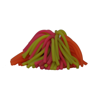

,Label: cup-and-ball toyPrediction: a blue and brown ball with a blue handle

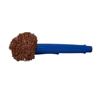

,"Label: teething ring with a bit photoshopped outPrediction: a wooden toy with a red, yellow, green and blue ball"

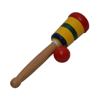

,Label: heart shaped slinkyPrediction: a pink plastic bracelet with four balls on it

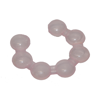

,Label: led topPrediction: a colorful plastic heart shaped toy with a rainbow colored ribbon

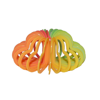

,Label: rubber toy found in toy aislePrediction: a green plastic cross shaped toy with a green plastic handle

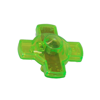

,Label: massagerPrediction: a blue and yellow ball with a blue and yellow tangle

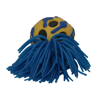

,Label: small personal fan without bladesPrediction: a wooden toy with four balls on it

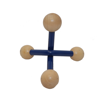

,Label: clackerPrediction: a blue and yellow plastic spray bottle

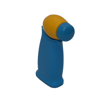

,Label: diving toy with small weightPrediction: a toy with a green and pink ball on it

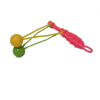

,Label: wooden ball toyPrediction: a toy with an orange and blue ball on it

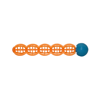

,Label: keychain with bubbles insidePrediction: a wooden spoon with five holes on it

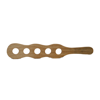

,Label: perfume sprayerPrediction: a small clear plastic box with a key chain

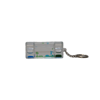

,Label: worm ball with hands and stars cut offPrediction: a black and silver metal cylinder with a white background

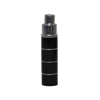

,Label: slide whistlePrediction: a pile of colorful plastic balls on a white background

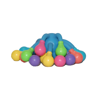

,Label: mobile phone stand for a carPrediction: a blue pen with a metal hook on it

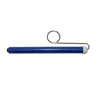

,Label: finger castanetPrediction: a black plastic car mount with a black plastic base

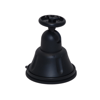

,Label: noisemakerPrediction: a green toilet seat with a pink bow on it

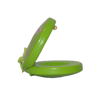

,Label: hand castanetPrediction: a green and pink plastic flower holder

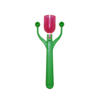

,Label: floating ball gamePrediction: a red and black metal pole with two black handles

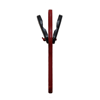

,Label: aroma therapy oil burnerPrediction: a wooden stick with a red handle on a white background

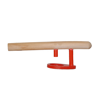

,Label: dog toyPrediction: a green vase with holes in it

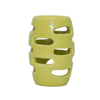

,Label: spout for watering canPrediction: a toy plane made of colorful plastic

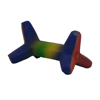

,Label: hole for children golf gamePrediction: a red fan with a black handle on a white background

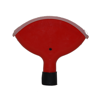

,Label: maraca penPrediction: a pink plastic toilet seat cover

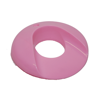

,Label: dog toy with removed ropePrediction: a purple spoon with a handle on a white background

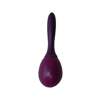

,Label: dog toyPrediction: a red plastic toy with a flower shape

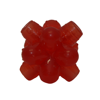

,Label: dog toyPrediction: a green donut toy with colorful dots on it

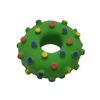

,Label: magic loopsPrediction: an orange plastic ring with spikes on it

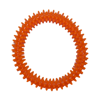

,Label: massagerPrediction: a metal sculpture of a planet with multi colored beads

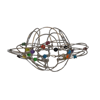

In [8]:
import pandas as pd
from PIL import Image
from IPython.display import HTML
import base64
from io import BytesIO

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('dataset.csv')

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    # Load the image
    img = Image.open(row['image_path'].replace("\\", "/"))
    img = img.resize((100, 100))
    
    # Convert the image to a supported format
    with BytesIO() as buffer:
        img.save(buffer, format="PNG")
        img_bytes = buffer.getvalue()

    # Encode the image as base64
    img_base64 = base64.b64encode(img_bytes).decode('utf-8')
    
    # Create a HTML table with the image and text
    html = f'<table><tr><td><img src="data:image/png;base64,{img_base64}" /></td><td><p><strong>Label:</strong> {row["actual name"]}</p><p><strong>Prediction:</strong> {row["BLIP-2 OPT-2.7b descriptions"]}</p></td></tr></table>'
    
    # Display the HTML table
    display(HTML(html))



##### Evaluate model results

In [9]:
import pandas as pd
from tqdm import tqdm
from evaluate import check_colors_and_textures

# Load dataset into DataFrame
df = pd.read_csv('dataset.csv')


# Add new column name to header row
df.rename(columns={df.columns[-1]: 'BLIP-2, OPT-2.7b evaluation: color and texture'}, inplace=True)

# Add new column data to remaining rows
for i, row in tqdm(df.iterrows(), total=len(df)):
    if pd.notnull(row.iloc[-2]):
        colors, textures = check_colors_and_textures(row.iloc[-2])
        colors = ", ".join(colors) if len(colors) > 0 else None
        textures = ", ".join(textures) if len(textures) > 0 else None
        df.at[i, 'BLIP-2, OPT-2.7b evaluation: color and texture'] = f"{colors}; {textures}"

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
display(df)

100%|██████████| 63/63 [00:00<00:00, 8527.48it/s]


,image_path,number label,actual name,familiarity score,nameability score,color saliency,BLIP-2 OPT-2.7b descriptions,"BLIP-2, OPT-2.7b evaluation: color and texture"
0,data\NOUN-2-600DPI\2001-600.jpg,2001,bookend,22,83,59,a pair of orange plastic toys on a white background,Orange; Plastic
1,data/NOUN-2-600DPI\2002-600.jpg,2002,fidget toy,59,74,19,a red metal sculpture with a curved shape,Red; None
2,data/NOUN-2-600DPI\2003-600.jpg,2003,pencil sharpener,41,70,48,a set of colorful wooden blocks arranged in a line,None; Wooden
3,data/NOUN-2-600DPI\2004-600.jpg,2004,fish tank stone,6,25,81,a yellow and orange plastic egg shaped object,"Orange, Yellow; Plastic"
4,data/NOUN-2-600DPI\2005-600.jpg,2005,space ship top,34,64,31,a rainbow tie dye headband with a pink and blue feather,"Blue, Pink; None"
5,data/NOUN-2-600DPI\2006-600.jpg,2006,air blower for slr cameras,22,46,78,a silver metal object with a red dot on it,"Red, Silver; None"
6,data/NOUN-2-600DPI\2007-600.jpg,2007,curlers formed together,34,25,48,a black ball with a red handle,"Red, Black; None"
7,data/NOUN-2-600DPI\2008.jpg,2008,dog toy,47,78,65,a blue rubber toy with two arms,Blue; Rubber
8,data/NOUN-2-600DPI\2009-600.jpg,2009,dog toy pet shop,66,52,50,a toy that looks like a spiky orange object,Orange; None
9,data/NOUN-2-600DPI\2010-600.jpg,2010,noisemaker,22,75,88,a red and yellow ball with colorful dots,"Red, Yellow; None"
